In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 676.2 kB/s eta 0:00:0000:0100:01
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24932 sha256=a88b51ab4fb3c238d5627cc0fc68488a40b7fbe8bfcb9932f2a49372c8b8b555
  Stored in directory: /Users/ylementova/Library/Caches/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score
Note: you may need to restart the kernel to use updated packages.


In [94]:
from scipy.stats import wilcoxon
import numpy as np
import pandas as pd

# Function to compute pairwise p-values for cosine similarity
def compute_cosine_similarity_pvalues(models, cosine_similarity_data):
    pval_matrix = pd.DataFrame(np.nan, index=models, columns=models)  # Initialize matrix with NaNs
    
    for i, model1 in enumerate(models):
        for j, model2 in enumerate(models):
            if i > j:  # Fill only below the main diagonal
                _, p_value = wilcoxon(cosine_similarity_data[model1], cosine_similarity_data[model2])
                pval_matrix.loc[model1, model2] = p_value

    return pval_matrix

# Collect cosine similarity results per model
cosine_similarity_data = {
    "output_val_cos_sim['gener_answer_0']": output_val_cos_sim['cosine_sim_0'].tolist(),
    "output_val_cos_sim['gener_answer_1']": output_val_cos_sim['cosine_sim_1'].tolist(),
    "output_val_cos_sim['gener_answer_2']": output_val_cos_sim['cosine_sim_2'].tolist(),
    "output_val_cos_sim['gener_answer_3']": output_val_cos_sim['cosine_sim_3'].tolist(),
    "output_val_cos_sim['gener_answer_4']": output_val_cos_sim['cosine_sim_4'].tolist(),
}

# List of model names
models = list(cosine_similarity_data.keys())

# Compute pairwise p-values for cosine similarity
pval_matrix_cosine = compute_cosine_similarity_pvalues(models, cosine_similarity_data)

# Add meaningful row and column names
pval_matrix_cosine.index.name = "Model"
pval_matrix_cosine.columns.name = "Model"

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [96]:
pval_matrix_cosine

Model,output_val_cos_sim['gener_answer_0'],output_val_cos_sim['gener_answer_1'],output_val_cos_sim['gener_answer_2'],output_val_cos_sim['gener_answer_3'],output_val_cos_sim['gener_answer_4']
Model,,,,,
output_val_cos_sim['gener_answer_0'],NaN,NaN,NaN,NaN,NaN
output_val_cos_sim['gener_answer_1'],0.966118,NaN,NaN,NaN,NaN
output_val_cos_sim['gener_answer_2'],0.264526,0.177114,NaN,NaN,NaN
output_val_cos_sim['gener_answer_3'],0.609459,0.683239,0.272095,NaN,NaN
output_val_cos_sim['gener_answer_4'],0.579842,0.777565,0.064039,0.646462,NaN


In [35]:
import pandas as pd
from rouge_score import rouge_scorer
import numpy as np

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

# Function to calculate ROUGE-L metrics (Precision and F1)
def calculate_rouge_metrics(generated_answers, reference_answers):
    rougeL_precision = []
    rougeL_f1 = []
    
    for generated, reference in zip(generated_answers, reference_answers):
        scores = scorer.score(reference, generated)
        rougeL_precision.append(scores['rougeL'].precision)
        rougeL_f1.append(scores['rougeL'].fmeasure)
    
    return np.mean(rougeL_precision), np.mean(rougeL_f1)

# Define models' answers
models = [
    "output_val_cos_sim['gener_answer_0']",
    "output_val_cos_sim['gener_answer_1']",
    "output_val_cos_sim['gener_answer_2']",
    "output_val_cos_sim['gener_answer_3']",
    "output_val_cos_sim['gener_answer_4']"
]

# Collect results
results = []
for model_name in models:
    generated_answers = eval(model_name)  # Evaluate the string to get the list of answers
    reference_answers = output_val_cos_sim['correct_answer'].tolist()
    precision, f1 = calculate_rouge_metrics(generated_answers, reference_answers)
    results.append([model_name, precision, f1])

# Create DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Precision (ROUGE-L)", "F1 Score (ROUGE-L)"])
results_df.set_index("Model", inplace=True)


In [78]:
from scipy.stats import wilcoxon
import numpy as np

# Function to compute pairwise p-values for statistical significance
def compute_pairwise_pvalues(metric_results, metric_name):
    models = metric_results.keys()
    num_models = len(models)
    pval_matrix = pd.DataFrame(np.nan, index=models, columns=models)  # Initialize matrix with NaNs
    
    for i, model1 in enumerate(models):
        for j, model2 in enumerate(models):
            if i > j:  # Fill only below the main diagonal
                _, p_value = wilcoxon(metric_results[model1], metric_results[model2])
                pval_matrix.loc[model1, model2] = p_value

    return pval_matrix

# Collect results per model
metric_results_precision = {}
metric_results_f1 = {}

for model_name in models:
    generated_answers = eval(model_name)  # Evaluate the string to get the list of answers
    reference_answers = output_val_cos_sim['correct_answer'].tolist()
    
    # Collect Precision and F1 scores
    precisions = []
    f1_scores = []
    
    for generated, reference in zip(generated_answers, reference_answers):
        scores = scorer.score(reference, generated)
        precisions.append(scores['rougeL'].precision)
        f1_scores.append(scores['rougeL'].fmeasure)
    
    metric_results_precision[model_name] = precisions
    metric_results_f1[model_name] = f1_scores

# Compute pairwise p-values for Precision (ROUGE-L)
pval_matrix_precision = compute_pairwise_pvalues(metric_results_precision, "Precision (ROUGE-L)")

# Compute pairwise p-values for F1 Score (ROUGE-L)
pval_matrix_f1 = compute_pairwise_pvalues(metric_results_f1, "F1 Score (ROUGE-L)")

# Add meaningful column and row names
pval_matrix_precision.index.name = "Model"
pval_matrix_precision.columns.name = "Model"
pval_matrix_f1.index.name = "Model"
pval_matrix_f1.columns.name = "Model"

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [45]:
results_df

,Precision (ROUGE-L),F1 Score (ROUGE-L),epoch
Model,,,
output_val_cos_sim['gener_answer_0'],0.136216,0.190527,0
output_val_cos_sim['gener_answer_1'],0.417412,0.304719,1
output_val_cos_sim['gener_answer_2'],0.385633,0.314924,2
output_val_cos_sim['gener_answer_3'],0.410274,0.322922,3
output_val_cos_sim['gener_answer_4'],0.402751,0.310918,4


In [39]:
results_df['epoch'] = [0, 1, 2, 3, 4]

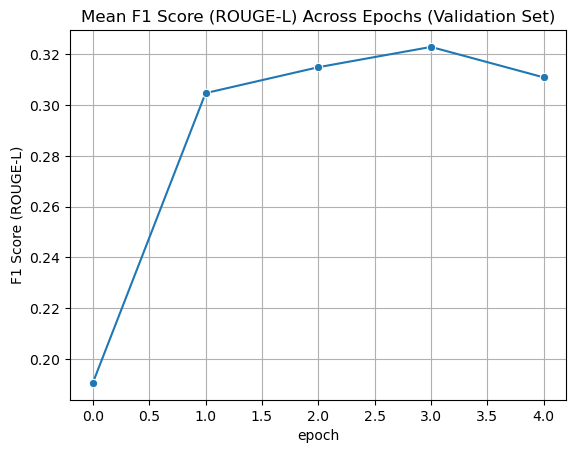

In [51]:
sns.lineplot(data = results_df, x = 'epoch', y = 'F1 Score (ROUGE-L)', marker ='o')
plt.title('Mean F1 Score (ROUGE-L) Across Epochs (Validation Set)')
plt.grid()

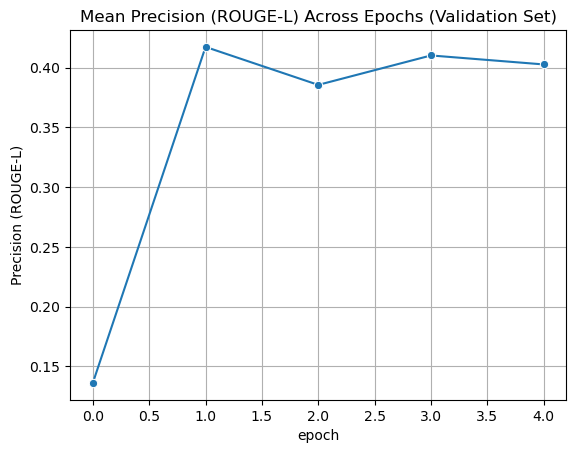

In [47]:
sns.lineplot(data = results_df, x = 'epoch', y = 'Precision (ROUGE-L)', marker ='o')
plt.title('Mean Precision (ROUGE-L) Across Epochs (Validation Set)')
plt.grid()

In [80]:
pval_matrix_precision

Model,output_val_cos_sim['gener_answer_0'],output_val_cos_sim['gener_answer_1'],output_val_cos_sim['gener_answer_2'],output_val_cos_sim['gener_answer_3'],output_val_cos_sim['gener_answer_4']
Model,,,,,
output_val_cos_sim['gener_answer_0'],NaN,NaN,NaN,NaN,NaN
output_val_cos_sim['gener_answer_1'],0.000008,NaN,NaN,NaN,NaN
output_val_cos_sim['gener_answer_2'],0.000038,0.310897,NaN,NaN,NaN
output_val_cos_sim['gener_answer_3'],0.000015,0.700703,0.099481,NaN,NaN
output_val_cos_sim['gener_answer_4'],0.000008,0.637767,0.637870,0.767097,NaN


In [88]:
pval_matrix_f1

Model,output_val_cos_sim['gener_answer_0'],output_val_cos_sim['gener_answer_1'],output_val_cos_sim['gener_answer_2'],output_val_cos_sim['gener_answer_3'],output_val_cos_sim['gener_answer_4']
Model,,,,,
output_val_cos_sim['gener_answer_0'],NaN,NaN,NaN,NaN,NaN
output_val_cos_sim['gener_answer_1'],0.001579,NaN,NaN,NaN,NaN
output_val_cos_sim['gener_answer_2'],0.001045,0.753152,NaN,NaN,NaN
output_val_cos_sim['gener_answer_3'],0.001289,0.382352,0.182338,NaN,NaN
output_val_cos_sim['gener_answer_4'],0.001579,0.777565,0.937473,0.260393,NaN


# Validation_set_output

In [3]:
output_val_cos_sim = pd.read_csv('valid_set_output.csv')

In [5]:
output_val_cos_sim

,question,correct_answer,gener_answer_0,cosine_sim_0,gener_answer_1,cosine_sim_1,gener_answer_2,cosine_sim_2,gener_answer_3,cosine_sim_3,gener_answer_4,cosine_sim_4
0,How can public transit infrastructure be enhan...,There are several ways to improve public trans...,Enhancing public transit infrastructure to bet...,0.789734,Public transit infrastructure can be enhanced ...,0.875823,Public transit infrastructure can be enhanced ...,0.846938,One way to enhance public transit infrastructu...,0.791335,One way to enhance public transit infrastructu...,0.791335
1,What are some widely used techniques for dimen...,"There are several common techniques, including...",Dimensionality reduction is a critical step in...,0.600298,Some widely used techniques for dimensionality...,0.766737,Some widely used techniques for dimensionality...,0.766737,Some widely used techniques for dimensionality...,0.766737,Some widely used techniques for dimensionality...,0.766737
2,Have archaeologists studied other examples of ...,"Yes, another example is the ancient trading ne...","Yes, archaeologists have extensively studied v...",0.627277,"Yes, archaeologists have studied various econo...",0.636594,"Yes, archaeologists have studied various econo...",0.653557,"Yes, archaeologists have studied various econo...",0.734420,"Yes, archaeologists have studied a variety of ...",0.633957
3,As a PhD student researching Tourism Managemen...,Online travel agencies have revolutionized the...,Your research topic is both timely and relevan...,0.695051,OTAs have certainly revolutionized the way peo...,0.658541,Online travel agencies have certainly disrupte...,0.932931,Online travel agencies have indeed disrupted t...,0.899400,Online travel agencies have indeed disrupted t...,0.899400
4,What are the potential drawbacks of using biol...,"Like any medication, biologics can have side e...","Biologics, also known as biopharmaceuticals or...",0.567812,Biologics can be expensive and may have side e...,0.569426,Biologics can be expensive and may have a high...,0.663384,Biologics can be expensive and may have a high...,0.663384,Biologics are a type of medicine that are made...,0.619565
5,How does interstellar matter (ISM) influence t...,ISM plays a major role in the evolution of gal...,"Interstellar matter (ISM), which includes gas,...",0.742343,Interstellar matter plays a crucial role in th...,0.684383,Interstellar matter plays a crucial role in th...,0.687536,Interstellar matter plays a crucial role in th...,0.687536,Interstellar matter plays a crucial role in th...,0.686287
6,What strategies can destinations implement to ...,Destinations can ensure that sports tourists h...,To ensure sports tourists have a positive expe...,0.787104,Destinations can implement a variety of strate...,0.898836,Destinations can implement a variety of strate...,0.895904,One strategy is to offer a variety of sports a...,0.788839,Destinations can implement a variety of strate...,0.875909
7,What are some typical challenges encountered d...,"Some common challenges include missing data, i...",Data preprocessing is a crucial step in the da...,0.654332,Some common challenges during data preprocessi...,0.661287,Some common challenges during data preprocessi...,0.661287,Some common challenges during data preprocessi...,0.661287,Some common challenges during data preprocessi...,0.661287
8,"As a PhD student, I am keen to explore adventu...",Adventure tourism is a form of tourism that in...,Adventure tourism is a growing industry that o...,0.761812,Adventure tourism can have both positive and n...,0.776899,Adventure tourism can have both positive and n...,0.784490,Adventure tourism can have both positive and n...,0.768110,Adventure tourism can have both positive and n...,0.782229
9,What strategies or techniques do tour planners...,One strategy that tour planners often use is t...,Tour planners use various strategies and techn...,0.844970,Tour planners often use a combination of resea...,0.850285,Tour planners use 

In [52]:
output_val_cos_sim.loc[1, 'gener_answer_0']

"Dimensionality reduction is a critical step in data preprocessing, especially in machine learning, where it helps to simplify models, reduce overfitting, and decrease computational costs. Here are some widely used techniques for dimensionality reduction:\n\n1. **Principal Component Analysis (PCA):**\n   - PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of linearly uncorrelated variables called principal components. The first principal component accounts for as much of the variability in the data as possible.\n   - It's widely used for noise reduction and feature extraction.\n\n2. **Linear Discriminant Analysis (LDA):**\n   - LDA is used for finding the linear combinations of features that best separate two or more classes. It's particularly useful when the goal is to maximize class separability.\n   - Unlike PCA, LDA takes class labels into"

### Statistical signifiance

In [28]:
from scipy.stats import wilcoxon

In [92]:
stat, p_value = wilcoxon(output_val_cos_sim['cosine_sim_0'], output_val_cos_sim['cosine_sim_4'])
p_value

0.5798416137695312

## Analize the distribution of cosing similarity

### Through all epochs (to see how cosin similarity changes after each epoch in every valid_question)

In [11]:
column_count = len([col for col in output_val_cos_sim.columns if col.startswith('cosine_sim')])
column_count

5

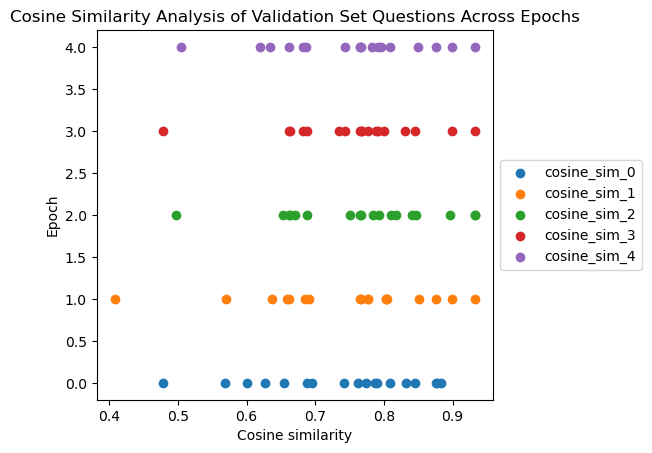

In [8]:
fig, ax = plt.subplots()
for num_epoch in np.arange(column_count):
    ax.scatter(output_val_cos_sim['cosine_sim_' + str(num_epoch)], np.full(output_val_cos_sim.shape[0], num_epoch), label='cosine_sim_' + str(num_epoch))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Cosine similarity')
ax.set_ylabel('Epoch')
plt.title('Cosine Similarity Analysis of Validation Set Questions Across Epochs')
plt.show()

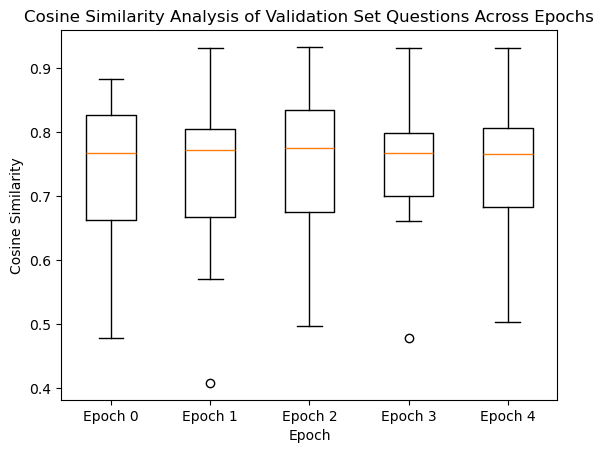

In [22]:
fig, ax = plt.subplots()

# Extract data for all epochs
column_count = 5  # Total number of epochs (0, 1, 2, 3, 4)
data = [output_val_cos_sim[f'cosine_sim_{epoch}'] for epoch in range(0, column_count)]

# Create the boxplot
ax.boxplot(data, positions=np.arange(column_count))

# Adjust plot appearance
ax.set_xlabel('Epoch')
ax.set_ylabel('Cosine Similarity')
ax.set_title('Cosine Similarity Analysis of Validation Set Questions Across Epochs')
ax.set_xticks(np.arange(column_count))
ax.set_xticklabels([f'Epoch {i}' for i in range(column_count)])

# Show the plot
plt.show()

### Distribution through each epoch

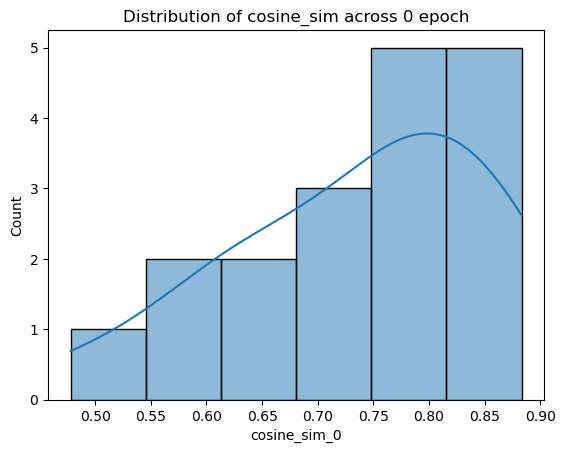

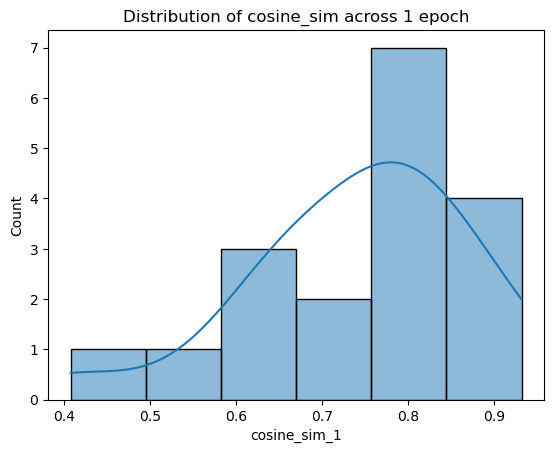

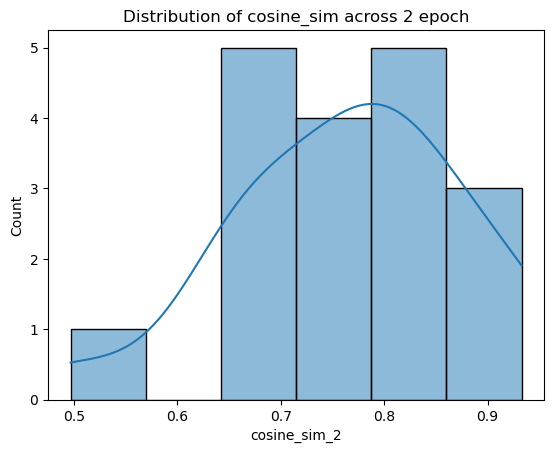

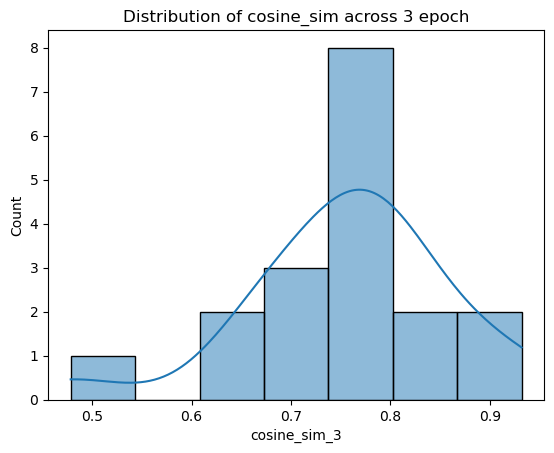

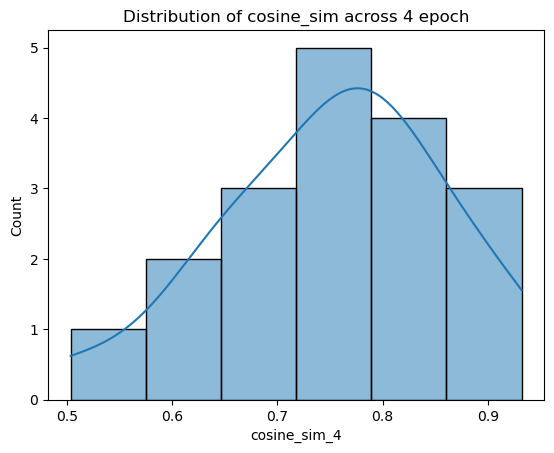

In [10]:
for i in range(column_count):
    sns.histplot(data=output_val_cos_sim, x=f'cosine_sim_{i}', kde=True)
    plt.title(f'Distribution of cosine_sim across {i} epoch')
    plt.show()

## Create df: epoch - cosing similarity

In [13]:
cos_sim_epoch_dic = {'epoch': [], 'cosine_sim_median': []}
for num_epoch in np.arange(column_count):
    cos_sim_epoch_dic['epoch'].append(num_epoch)
    cos_sim_epoch_dic['cosine_sim_median'].append(output_val_cos_sim['cosine_sim_'+ str(num_epoch)].median())
cos_sim_epoch_df = pd.DataFrame(cos_sim_epoch_dic)

In [15]:
cos_sim_epoch_df

,epoch,cosine_sim_median
0,0,0.767520
1,1,0.771759
2,2,0.775613
3,3,0.767423
4,4,0.766167


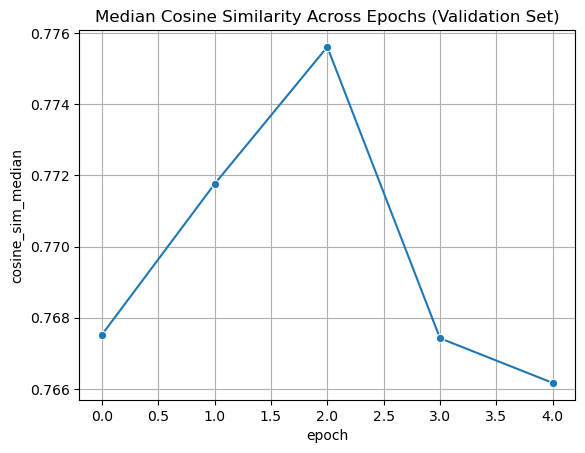

In [17]:
sns.lineplot(data = cos_sim_epoch_df, x = 'epoch', y = 'cosine_sim_median', marker ='o')
plt.title('Median Cosine Similarity Across Epochs (Validation Set)')
plt.grid()

## Define which topic is necessary for improving using prompt

In [16]:
output_val_cos_sim[output_val_cos_sim['cosine_sim_2'] < 0.6]

,question,correct_answer,gener_answer_0,cosine_sim_0,gener_answer_1,cosine_sim_1,gener_answer_2,cosine_sim_2,gener_answer_3,cosine_sim_3,gener_answer_4,cosine_sim_4
12,What challenges are hindering the implementati...,"There are a few challenges. For example, the c...",The implementation of Collaborative Decision M...,0.478041,One of the main challenges is the lack of stan...,0.407719,One of the main challenges is the lack of stan...,0.496804,One of the main challenges is the lack of stan...,0.47846,One of the main challenges is the lack of stan...,0.503707


In [17]:
best_epoch = 2

# Test_set_output

In [5]:
output_test_cos_sim = pd.read_csv('test_set_output.csv')

## Analize the distribution of cosing similarity

### Through the epoch

In [7]:
best_epoch = 2

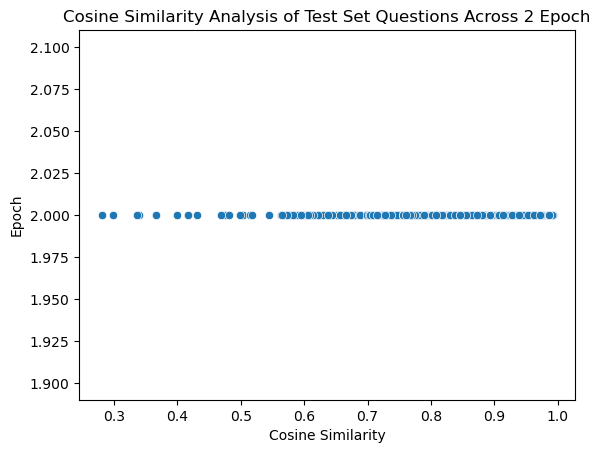

In [13]:
sns.scatterplot(x=output_test_cos_sim['cosine_sim_0'], y=np.full(output_test_cos_sim.shape[0], best_epoch))
plt.title('Cosine Similarity Analysis of Test Set Questions Across '+str(best_epoch)+ ' Epoch')
plt.xlabel('Cosine Similarity')
plt.ylabel('Epoch')
plt.show()

In [ ]:
sns.histplot(data=output_test_cos_sim, x=output_test_cos_sim['cosine_sim_0'], kde=True)
plt.title('Distribution of cosine_sim across '+ str(best_epoch)+ ' epoch')
plt.show()

### Distribution through the epoch

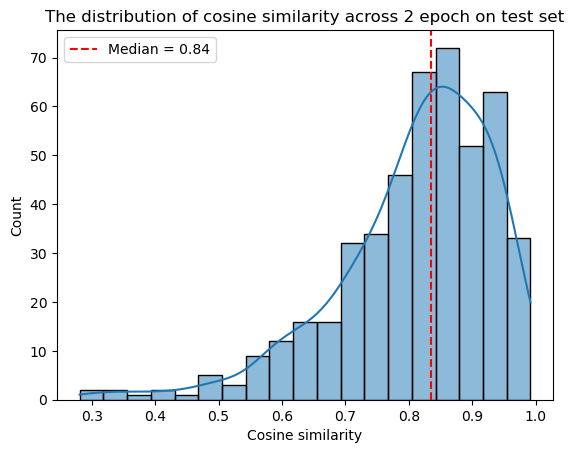

In [25]:
median_value = np.median(output_test_cos_sim['cosine_sim_0'])
sns.histplot(data=output_test_cos_sim, x=output_test_cos_sim['cosine_sim_0'], kde=True)
plt.axvline(median_value, color='red', linestyle='--', label=f'Median = {median_value:.2f}')
plt.xlabel('Cosine similarity')
plt.title('The distribution of cosine similarity across ' + str(best_epoch) + ' epoch on test set')
plt.legend()
plt.show()

## Create df: epoch - cosing similarity

In [27]:
cos_sim_best_epoch_df = pd.DataFrame({'epoch': [best_epoch], 'cosine_sim_median': [output_test_cos_sim['cosine_sim_0'].median()]})

In [28]:
cos_sim_best_epoch_df

,epoch,cosine_sim_median
0,2,0.835421


## Define the topics for prompts

In [30]:
output_test_cos_sim.loc[78, 'question']

'Hello, I am interested in discussing the field of linguistic anthropology and its relationship with archaeology.'

In [31]:
output_test_cos_sim.loc[78, 'correct_answer']

'Certainly, I can help. What specific aspects of this relationship would you like to explore?'

In [32]:
output_test_cos_sim.loc[78, 'gener_answer_0']

'Certainly, linguistic anthropology is a subfield of anthropology that focuses on the study of language and its role in human culture. How would you like to proceed?'

In [33]:
output_test_cos_sim[output_test_cos_sim['cosine_sim_0'] < 0.5]

,question,correct_answer,gener_answer_0,cosine_sim_0
78,"Hello, I am interested in discussing the field...","Certainly, I can help. What specific aspects o...","Certainly, linguistic anthropology is a subfie...",0.280558
91,What are some of the most important lessons th...,One of the most important lessons we can learn...,One of the most important lessons that we can ...,0.475299
137,Can you provide an example of a successful app...,Certainly. One example is the Virtual Curation...,One example of a successful application of Vir...,0.469160
152,What do you think the future holds for Action ...,I believe that we will continue to see advance...,Action Recognition technology is expected to c...,0.398693
164,What are some of the challenges that need to b...,There are several challenges that need to be a...,One of the main challenges is the ability of t...,0.416152
240,"Hello, I am interested in learning about model...",Great. Model deployment is an essential step i...,"Certainly, I can help. What specifically would...",0.297715
256,What are some of the challenges involved in mo...,One major challenge is the high dimensionality...,One of the main challenges in model optimizati...,0.430634
304,What are some of the challenges associated wit...,One of the main challenges is dealing with sen...,One of the main challenges is dealing with dyn...,0.339739
355,What can we learn about exoplanet atmospheres ...,By analyzing the light that passes through or ...,Transmission spectroscopy involves observing t...,0.498650
368,How is continuum emission related to the tempe...,The temperature of a celestial body affects th...,Continuum emission is the emission of electrom...,0.481412


## Analysis prompt's effect

In [35]:
output_test_cos_sim_prompt = pd.read_csv('test_set_output_with_prompt.csv')

In [123]:
output_test_cos_sim_prompt['cosine_sim_0'].median()

0.822034625

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


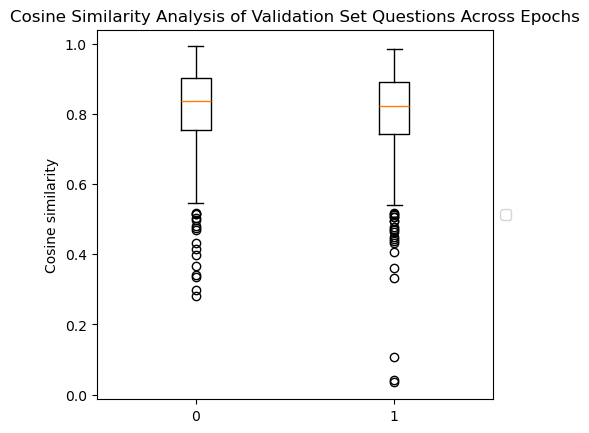

In [120]:
fig, ax = plt.subplots()
ax.boxplot(output_test_cos_sim['cosine_sim_0'], positions=[0])
ax.boxplot(output_test_cos_sim_prompt['cosine_sim_0'], positions=[1])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Cosine similarity')
plt.title('Cosine Similarity Analysis of Validation Set Questions Across Epochs')
plt.show()

### Analize outliers in test_with_prompt

In [68]:
output_test_cos_sim_prompt[output_test_cos_sim_prompt['cosine_sim_0'] < 0.2]

,question,correct_answer,gener_answer_0,cosine_sim_0
78,"Hello, I am interested in discussing the field...","Certainly, I can help. What specific aspects o...",Linguistic anthropology is the study of langua...,0.108292
278,"Hello, I would like to discuss recommender sys...","Certainly, I'd be happy to help. What specific...",Recommender systems are a type of machine lear...,0.041920
302,"Hello, I am interested in discussing the topic...","Of course, I'd be happy to chat with you about...",Robot Localization and Mapping is a subfield o...,0.034541


In [72]:
output_test_cos_sim_prompt.loc[78, 'question']

'Hello, I am interested in discussing the field of linguistic anthropology and its relationship with archaeology.'

In [74]:
output_test_cos_sim_prompt.loc[78, 'correct_answer']

'Certainly, I can help. What specific aspects of this relationship would you like to explore?'

In [76]:
output_test_cos_sim_prompt.loc[78, 'gener_answer_0']

'Linguistic anthropology is the study of language and its relationship to culture, society, and history. It is closely related to archaeology, as both fields seek to understand human behavior and culture through material remains.'

In [78]:
output_test_cos_sim.loc[78, 'gener_answer_0']

'Certainly, linguistic anthropology is a subfield of anthropology that focuses on the study of language and its role in human culture. How would you like to proceed?'

In [104]:
output_test_cos_sim_prompt.loc[302, 'question']

'Hello, I am interested in discussing the topic of Robot Localization and Mapping within the field of Artificial Intelligence and Machine Learning.'

In [106]:
output_test_cos_sim_prompt.loc[302, 'correct_answer']

"Of course, I'd be happy to chat with you about it. What specific questions or topics would you like me to cover?"

In [108]:
output_test_cos_sim_prompt.loc[302, 'gener_answer_0']

'Robot Localization and Mapping is a subfield of Artificial Intelligence and Machine Learning that focuses on the development of algorithms and techniques for robots to navigate and map their environment. This involves the use of sensors, such as cameras and lidars, to gather data about the environment and algorithms to process this data and create a map of the environment.'

In [90]:
output_test_cos_sim.loc[278, 'gener_answer_0']

'Certainly, what would you like to know?'

In [132]:
a = output_test_cos_sim.iloc[0:10].reset_index(drop=True)

In [134]:
a

,question,correct_answer,gener_answer_0,cosine_sim_0
0,"Hello, I am interested in learning about the f...",Applied anthropology is a subfield of anthropo...,Certainly. Applied anthropology is the applica...,0.913682
1,Can you give me an example of how applied anth...,Sure. Let's say there is a proposed developmen...,Certainly. One example is the use of archaeolo...,0.663899
2,"I'm curious though, what are some other areas ...",Applied anthropology can be used in a variety ...,Applied anthropology is used in a variety of f...,0.844441
3,It seems that applied anthropology is focused ...,Traditional anthropology is focused on underst...,Applied anthropology is a subfield of anthropo...,0.877252
4,"As a PhD student, I am interested in learning ...","Certainly. In recent years, there has been a g...",Certainly. Archaeological Science is a rapidly...,0.849948
5,How do isotopic analysis and DNA analysis comp...,The use of scientific methods can help to prov...,Isotopic analysis and DNA analysis are two com...,0.883236
6,Are there any particular challenges associated...,"Yes, there are several challenges. One is the ...","Yes, there are several challenges associated w...",0.847307
7,"As a PhD student in anthropology, I am particu...","Yes, I completely agree. Biocultural anthropol...","Yes, I agree. Biocultural anthropology is a fa...",0.927257
8,I think one of the strengths of biocultural an...,That's a great point. Biocultural anthropology...,"Yes, that's a great point. Biocultural anthrop...",0.750049
9,I have been studying the field of Biological A...,Certainly. There are several fields within Bio...,Certainly. Biological Anthropology is a broad ...,0.921775


### Buff

In [103]:
output_val_cos_sim_prompt = pd.read_csv('valid_set_output_with_prompt.csv')

In [109]:
output_val_cos_sim_prompt.loc[9, 'question']

'What strategies or techniques do tour planners use to create unique and memorable experiences for their clients while also managing budget and time constraints?'

In [111]:
output_val_cos_sim_prompt.loc[9, 'correct_answer']

'One strategy that tour planners often use is to incorporate a mix of activities and experiences that appeal to a variety of interests and budgets. They may also offer optional add-ons or upgrades that allow clients to personalize their experience and enhance certain aspects of the tour. Additionally, tour planners may negotiate with vendors and tour operators to secure discounts or special rates, which can help to manage costs without sacrificing the quality of the tour.'

In [113]:
output_val_cos_sim_prompt.loc[9, 'gener_answer_0']

'Tour planners use a variety of strategies to create unique and memorable experiences for their clients while also managing budget and time constraints. These strategies include researching and selecting unique destinations, incorporating local culture and traditions, and offering personalized experiences.'

In [119]:
output_val_cos_sim.loc[9, 'gener_answer_2']

"Tour planners use a variety of strategies to create unique and memorable experiences for their clients while also managing budget and time constraints. One common technique is to focus on the destination's unique cultural and natural features, and to design tours that highlight these aspects. Another strategy is to incorporate local experiences, such as homestays or cooking classes, to give travelers a deeper understanding of the destination's culture. Additionally, tour planners may use technology, such as virtual reality or augmented reality, to enhance the tour experience and provide a more immersive experience for travelers."

In [105]:
pd.concat([output_val_cos_sim['cosine_sim_2'], output_val_cos_sim_prompt['cosine_sim_0']], keys = ['No_prompt', 'With_prompt'], axis = 1)

,No_prompt,With_prompt
0,0.846938,0.876824
1,0.766737,0.757231
2,0.653557,0.696215
3,0.932931,0.739179
4,0.663384,0.629424
5,0.687536,0.778111
6,0.895904,0.892882
7,0.661287,0.659318
8,0.784490,0.912669
9,0.750633,0.870244


In [107]:
output_val_cos_sim['cosine_sim_0'].median()

0.76752025

In [63]:
pd.concat([output_val_cos_sim['cosine_sim_2'], output_val_cos_sim_prompt['cosine_sim_0']], keys = ['No_prompt', 'With_prompt'], axis = 1)

,No_prompt,With_prompt
0,0.846938,0.799647
1,0.766737,0.786489
2,0.653557,0.662920
3,0.932931,0.673759
4,0.663384,0.677371
5,0.687536,0.768370
6,0.895904,0.870959
7,0.661287,0.628084
8,0.784490,0.762756
9,0.750633,0.516449


In [132]:
output_val_cos_sim['cosine_sim_0'].median()

0.76752025

In [87]:
output_val_cos_sim_prompt['cosine_sim_1'].median()

0.77175858

In [89]:
output_val_cos_sim_prompt['cosine_sim_2'].median()

0.7756133350000001

In [91]:
output_val_cos_sim_prompt['cosine_sim_3'].median()

0.7674233